Original Dataset Evaluation:

Accuracy: 0.7015
Precision: 0.7056179775280899
Recall: 0.652128764278297
F1 Score: 0.6778197517539126
Confusion Matrix:


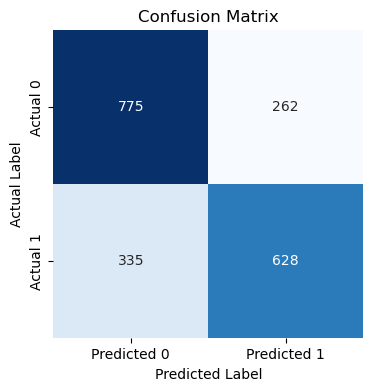

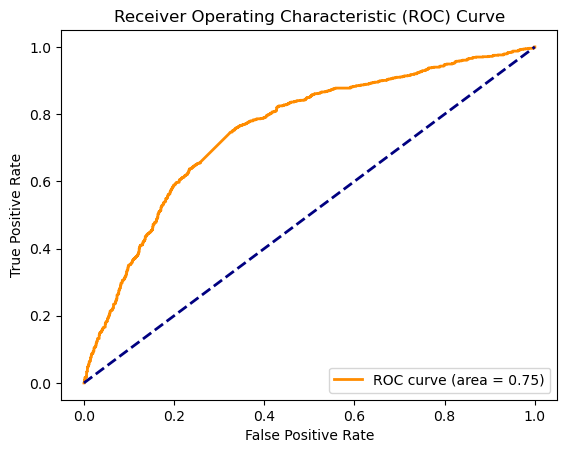

AUC-ROC Score: 0.7525191987831341


In [1]:
# Import all necessary tools used for project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, auc

# Start with the unmodified dataset 

df = pd.read_csv('./full_data_40.csv')
df = df.head(10000) # Trim off extra rows

# In a seperate python program we used these matchIDs to make calls to riots API and fetch the extra data used 
# for our new logistic regression model

df.drop('matchID', axis=1, inplace=True) 

# Remove redundant rows from dataset
df.drop('fullTimeMS', axis=1, inplace=True)
df.drop('redWin', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('timePercent', axis=1, inplace=True)

# og meaning original dataset
y_og = df['blueWin']
X_og = df.drop('blueWin', axis=1)

# We used 80% training and 20% testing for 10000 game (8000 training, 2000 testing)
X_train_og, X_test_og, Y_train_og, Y_test_og = train_test_split(X_og, y_og,test_size=0.2, random_state=11)

# Logregression model with increased iterations to remove warning messages
model = LogisticRegressionCV(max_iter=1000)

model.fit(X_train_og, Y_train_og)

Y_predict_og = model.predict(X_test_og)

# The logistical regression model predicts the game outcome with an expected 70% accuracy. This dataset does not 
# include the additional features scraped from the riot API

accuracy = accuracy_score(Y_test_og, Y_predict_og)
precision = precision_score(Y_test_og, Y_predict_og)
recall = recall_score(Y_test_og, Y_predict_og)
f1 = f1_score(Y_test_og, Y_predict_og)
confuse_mat = confusion_matrix(Y_test_og, Y_predict_og)

# This is for printing and plotting data
print("Original Dataset Evaluation:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
plt.figure(figsize=(4, 4))
sns.heatmap(confuse_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(Y_test_og, model.predict_proba(X_test_og)[:, 1])
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC Score:", auc_score)

Modified Dataset Evaluation:

Accuracy: 0.9265
Precision: 0.9280575539568345
Recall: 0.9214285714285714
F1 Score: 0.9247311827956989
Confusion Matrix:


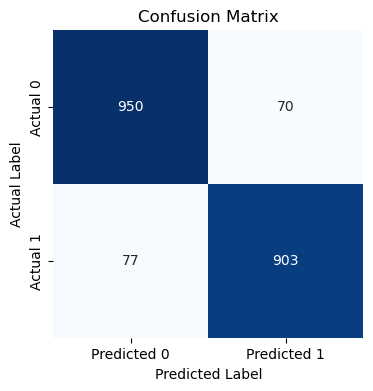

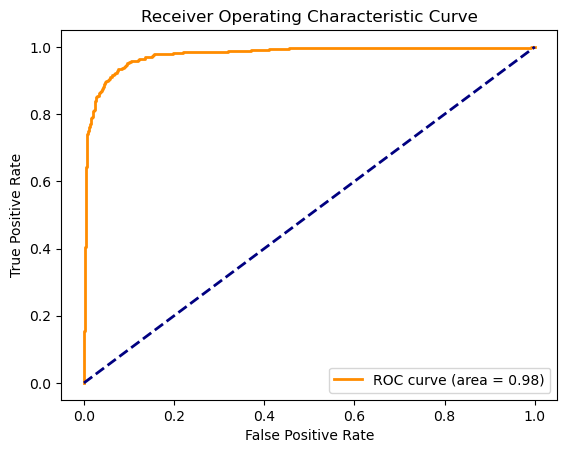

AUC-ROC Score: 0.9771148459383754


In [2]:

# Import our new dataset that contains the 4 new features (red/blue champion experience and red/blue overall level)
df = pd.read_csv('./mergedDataset.csv')

# Remove redundant columns
df.drop('matchID', axis=1, inplace=True)
df.drop('fullTimeMS', axis=1, inplace=True)
df.drop('redWin', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('timePercent', axis=1, inplace=True)

y = df['blueWin']
X = df.drop('blueWin', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegressionCV(max_iter=1000)

model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)


# The logistical regression model predicts the game outcome with a new 0.93 accuracy. This dataset incldues the
# 4 new additional features from riots API 

accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
confuse_mat = confusion_matrix(Y_test, Y_predict)


print("Modified Dataset Evaluation:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
plt.figure(figsize=(4, 4))
sns.heatmap(confuse_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC Score:", auc_score)


Modified Dataset Evaluation:

Accuracy: 0.673
Precision: 0.6775599128540305
Recall: 0.6346938775510204
F1 Score: 0.6554267650158061
Confusion Matrix:


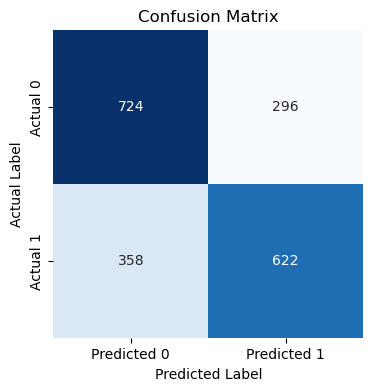

In [3]:
# K-nearest neighbours model
knn_model = KNeighborsClassifier(n_neighbors=11)

# Using standard scaler to scale the dataset
s=StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

knn_model.fit(X_train_scaled, Y_train)
Y_predict = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
confuse_mat = confusion_matrix(Y_test, Y_predict)

print("Modified Dataset Evaluation:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
plt.figure(figsize=(4, 4))
sns.heatmap(confuse_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/30
200/200 [==============================] - 1s 2ms/step - loss: 0.4211 - accuracy: 0.8120 - val_loss: 0.2230 - val_accuracy: 0.8940
Epoch 2/30
200/200 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8806 - val_loss: 0.2412 - val_accuracy: 0.8890
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.8881 - val_loss: 0.2480 - val_accuracy: 0.8920
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.8907 - val_loss: 0.2376 - val_accuracy: 0.8940
Epoch 5/30
200/200 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9000 - val_loss: 0.2610 - val_accuracy: 0.8880
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.8997 - val_loss: 0.2268 - val_accuracy: 0.8980
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.8975 - val_loss: 0.2089 - val_accuracy: 0.9040
Epoch 

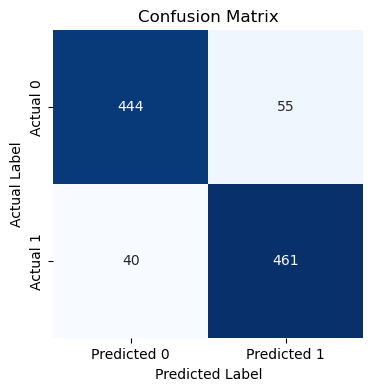

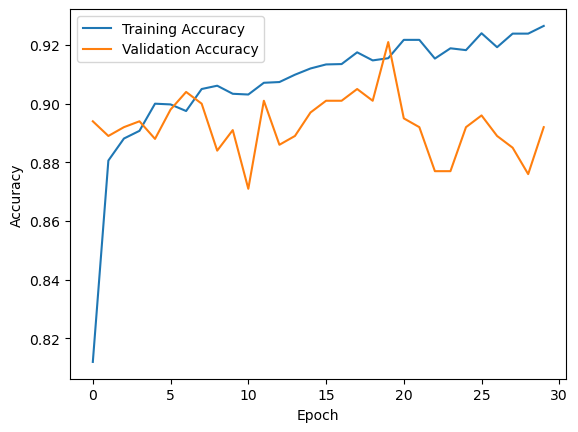

In [4]:
# Deep neural network model
model = keras.Sequential()


x = X_test
y = Y_test

# Split the testing set to make a validation set
X_val, X_test, Y_val, Y_test = train_test_split(x, y, test_size=0.5)

# Convert dataset to floats so it doesnt throw errors
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

# Flatten the input layer
model.add(layers.Flatten(input_shape=(40,)))  

# Alternating dropout, normalization, and dense layers
for _ in range(5):
    model.add(layers.Dropout(0.0069))
    model.add(layers.BatchNormalization())
    # elu activation with HE normalizer for dense layers
    model.add(layers.Dense(160, activation='elu', kernel_initializer='he_normal'))
    
# final layer uses sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train,validation_data=(X_val, Y_val), epochs=30, batch_size=40)

loss, accuracy = model.evaluate(X_test, Y_test)
# Report results
print(f"Loss:",loss)
predictions = model.predict(X_test)
Y_predict = np.round(predictions)

accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
confuse_mat = confusion_matrix(Y_test, Y_predict)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(4, 4))
sns.heatmap(confuse_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()